In [2]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [3]:
df= pd.read_excel("dataset.xlsx")
df

,product_id,brand_name,title,current_price,previous_price,Gender,currency,rrp,productCode,productType
0,204499665,Replay,Replay t-shirt in white,72.00,NaN,M,USD,100.00,127434315,Product
1,203420859,Jack & Jones,Jack & Jones script logo t-shirt in white,17.00,NaN,M,USD,21.00,121133019,Product
2,204285229,Jack & Jones,Jack & Jones logo polo in pale green,34.00,NaN,M,USD,43.00,126403589,Product
3,202261918,Don't Think Twice,DTT denim board shorts in light blue,31.00,NaN,M,USD,42.00,116069818,Product
4,202191610,Another Influence,Another Influence towelling shorts co-ord in m...,23.00,NaN,M,USD,48.00,115976447,Product
...,...,...,...,...,...,...,...,...,...,...
61195,203652134,Dune,Dune jacquard logo cross body bag in brown,53.69,66.32,F,USD,108.96,121950307,Product
61196,203778655,Dune,Dune cosmetics bag gift set in tan monogram,47.37,58.43,F,USD,91.59,122836149,Product
61197,203202947,NaaNaa,NaaNaa yellow mini dress with cut out detail a...,48.00,NaN,F,USD,78.00,120046949,Product
61198,204060148,Brave Soul,Brave Soul strappy back swimsuit in navy,27.00,NaN,F,USD,53.00,124523798,Product


**Overview**

* product_id: A unique identifier for each product
* brand_name: The name of the brand that makes the product
* title: The name of the product
* current_price: The current price of the product in USD
* previous_price: The previous price of the product in USD (if available)
* Gender: The gender that the product is targeted towards (M for Men)
* currency: The currency that the price is listed in (USD)
* rrp: The recommended retail price of the product (possibly in USD)
* productCode: A unique code for the product
* productType: The type of product (e.g. Product, Trainer)

**Objective**

1. **Price analysis:** Businesses can use the data to track price fluctuations of specific products or entire categories over time. This can help them develop competitive pricing strategies and optimize their own product pricing.

2. **Product research and development:** By analyzing product features, types, and brands, companies can gain insights into what kind of products are popular and identify potential gaps in the market. This information can inform product development and marketing strategies.

3. **Recommendation systems:**  E-commerce platforms can leverage datasets like this to build recommendation systems that suggest relevant products to users based on their past purchases or browsing history.

4. **Market research:** Researchers can analyze the data to understand consumer trends, identify popular brands and product categories, and gauge market demand for specific types of products.

5. **Machine learning applications:** The data can be used to train machine learning models for various tasks, such as product classification, sentiment analysis of customer reviews, or predicting future demand for specific products.


In [4]:
df_cat = df[['Gender', 'productType','brand_name']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['current_price', 'rrp','previous_price']] # Non-Categorical Data

1. `df_cat = df[['Gender', 'productType','brand_name']]`: This line creates a new DataFrame `df_cat` containing only the columns 'Gender', 'productType', and 'brand_name' from the original DataFrame `df`. These columns are typically considered categorical because they represent categories or labels rather than numerical data. Categorical data can further be divided into nominal (categories without an inherent order) or ordinal (categories with a specific order).

2. `df_noncat = df[['current_price', 'rrp','previous_price']]`: Similarly, this line creates a new DataFrame `df_noncat` containing only the columns 'current_price', 'rrp', and 'previous_price'. These columns are numerical data representing prices, and thus are considered non-categorical.

The comments `# Categorical Data [Nominal | Ordinal]` and `# Non-Categorical Data` provide a brief description of the type of data contained in each DataFrame. The comment suggests that the 'Gender', 'productType', and 'brand_name' columns may contain either nominal or ordinal categorical data, while the 'current_price', 'rrp', and 'previous_price' columns contain non-categorical data (i.e., numerical data).

Overall, this code is simply splitting the original DataFrame into two separate DataFrames based on the type of data they contain, which can be useful for subsequent analysis or preprocessing tasks specific to each data type.

In [5]:
# Dataset Used : df

df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61200 entries, 0 to 61199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61200 non-null  int64  
 1   brand_name      61200 non-null  object 
 2   title           61200 non-null  object 
 3   current_price   61200 non-null  float64
 4   previous_price  25280 non-null  float64
 5   Gender          61200 non-null  object 
 6   currency        61200 non-null  object 
 7   rrp             43326 non-null  float64
 8   productCode     61200 non-null  int64  
 9   productType     61200 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 4.7+ MB


1854     2
198      2
12942    2
3078     2
5814     2
dtype: int64

This code segment seems to be focused on providing information about missing data in the DataFrame `df`. Let's break it down:

1. `Dataset Used: df`:the DataFrame being used in the subsequent code is named `df`.

2. `df.info()`: This line of code prints out an overview of the DataFrame `df`, including the column names, data types, and the number of non-null values in each column. This can be helpful in understanding the structure and basic characteristics of the DataFrame.

3. `variable_missing_data = df.isna().sum()`: This line calculates the number of missing values (NaNs) for each variable (column) in the DataFrame `df`. It uses the `isna()` method to create a boolean mask where `True` indicates missing values, and then `sum()` is used to count the number of `True` values for each column. The result is stored in the variable `variable_missing_data`.

4. `variable_missing_data`: This line prints out the variable-wise missing data information, showing the number of missing values for each column in the DataFrame `df`.

5. `record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5)`: This line calculates the number of missing values for each record (row) in the DataFrame `df`, sorts them in descending order, and selects the top 5 records with the most missing values. It first sums the missing values across columns (`axis=1`), then sorts them in descending order, and finally selects the first 5 records with `.head(5)`. The result is stored in the variable `record_missing_data`.

6. `record_missing_data`: This line prints out the record-wise missing data information, showing the top 5 records with the most missing values.


In [6]:
# 1.2.1. Impute Missing Categorical Data [Nominal | Ordinal] using Descriptive Satatistics : Central Tendency (Mode)
# ------------------------------------------------------------------------------------------------------------------

# Dataset Used : df_cat

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
print(df_cat_mdi)
df_cat_mdi.info()

      Gender      productType         brand_name
0          M          Product             Replay
1          M          Product       Jack & Jones
2          M          Product       Jack & Jones
3          M          Product  Don't Think Twice
4          M          Product  Another Influence
...      ...              ...                ...
61195      F          Product               Dune
61196      F          Product               Dune
61197      F          Product             NaaNaa
61198      F          Product         Brave Soul
61199      F  MixMatchProduct  French Connection

[61200 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61200 entries, 0 to 61199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       61200 non-null  object
 1   productType  61200 non-null  object
 2   brand_name   61200 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB



1. **Objective**:
   - The objective of this code segment is to preprocess a dataset (`df_cat`) by handling missing values in categorical variables.
   - Specifically, it aims to impute missing categorical data using a strategy based on central tendency, where missing values are replaced with the most frequent value in each respective column.

2. **Insight**:
   - The insight gained from this code is the ability to ensure completeness and integrity of the dataset before further analysis or modeling.
   - By replacing missing categorical values with the most frequent value, it prevents potential bias in the data analysis or modeling process that could arise from excluding incomplete records.

3. **Analysis**:
   - The code employs the `SimpleImputer` class from scikit-learn, a widely used library for machine learning tasks, to handle missing values.
   - It selects the strategy of `'most_frequent'`, indicating that the mode (most frequent value) of each categorical column will be used for imputation.
   - The `fit_transform` method of the `SimpleImputer` object is applied to the dataset (`df_cat`), performing the imputation process.
   - After imputation, a new DataFrame (`df_cat_mdi`) is created to store the imputed values, maintaining the original column structure.
   - Finally, the code provides information about the imputed DataFrame using the `info()` method, offering insights into the distribution of imputed values across columns.

4. **Conclusion**:
   - Through this code, missing categorical data is effectively handled, ensuring that the dataset is complete and suitable for subsequent analysis or modeling tasks.
   - The use of a simple yet robust strategy, such as replacing missing values with the most frequent value, ensures minimal data loss and preserves the integrity of the dataset.

5. **Managerial Implications**:
   - From a managerial perspective, ensuring data completeness is crucial for making informed decisions based on analytics.
   - By employing systematic data preprocessing techniques like imputation, organizations can enhance the quality and reliability of their data-driven insights.
   - Moreover, maintaining data integrity contributes to building trust in analytical processes and facilitates more accurate strategic decision-making.

In summary, this code segment demonstrates a fundamental step in data preprocessing, addressing missing categorical data through a strategy based on central tendency. It aligns with best practices in data management and sets the stage for further analysis and interpretation of the dataset.

In [7]:
# 1.2.2.1. Impute Missing Non-Categorical Data using Descriptive Statistics : Central Tendency
# --------------------------------------------------------------------------------------------

# Dataset Used : df_noncat

si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
print(df_noncat_mdi_si)
df_noncat_mdi_si.info()

       current_price     rrp  previous_price
0              72.00  100.00       51.095332
1              17.00   21.00       51.095332
2              34.00   43.00       51.095332
3              31.00   42.00       51.095332
4              23.00   48.00       51.095332
...              ...     ...             ...
61195          53.69  108.96       66.320000
61196          47.37   91.59       58.430000
61197          48.00   78.00       51.095332
61198          27.00   53.00       51.095332
61199          31.00   51.00       51.095332

[61200 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61200 entries, 0 to 61199
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   current_price   61200 non-null  float64
 1   rrp             61200 non-null  float64
 2   previous_price  61200 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB



1. **Objective**:
   - The objective here is to handle missing values in non-categorical variables within the dataset (`df_noncat`).
   - Specifically, it aims to impute missing non-categorical data using a strategy based on central tendency, where missing values are replaced with the mean value of each respective column.

2. **Insight**:
   - This process ensures that the dataset is complete and ready for further analysis or modeling by filling in missing values with representative values.
   - Imputing missing data based on central tendency helps maintain the overall distribution and characteristics of the original dataset.

3. **Analysis**:
   - The code utilizes the `SimpleImputer` class from scikit-learn library for handling missing values.
   - It specifies the strategy as `'mean'`, indicating that the mean value of each numerical column will be used for imputation.
   - The `fit_transform` method of the `SimpleImputer` object is applied to the dataset (`df_noncat`), performing the imputation process.
   - After imputation, a new DataFrame (`df_noncat_mdi_si`) is created to store the imputed values, maintaining the original column structure.
   - Finally, the code provides information about the imputed DataFrame using the `info()` method, offering insights into the distribution of imputed values across columns.

4. **Conclusion**:
   - Through this code, missing non-categorical data is effectively handled, ensuring that the dataset is complete and suitable for subsequent analysis or modeling tasks.
   - The use of a simple yet robust strategy, such as replacing missing values with the mean, ensures minimal data loss and preserves the integrity of the dataset.

5. **Managerial Implications**:
   - Data completeness is essential for deriving accurate insights and making informed decisions based on analytics.
   - By employing systematic data preprocessing techniques like imputation, organizations can enhance the quality and reliability of their data-driven insights.
   - Maintaining data integrity through proper handling of missing values fosters trust in analytical processes and facilitates more accurate strategic decision-making.

In summary, this code segment demonstrates an essential step in data preprocessing, addressing missing non-categorical data through a strategy based on central tendency. It aligns with best practices in data management and sets the stage for further analysis and interpretation of the dataset.

In [8]:
# 2. Numeric Coding of Data
# -------------------------

# 2.1. Numeric Encoding of Categorical Data [Nominal & Ordinal]
# -------------------------------------------------------------

# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdi.copy()

# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['Gender_code', 'productType_code','brand_name_code']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,Gender,productType,brand_name,Gender_code,productType_code,brand_name_code
0,M,Product,Replay,1.0,2.0,40.0
1,M,Product,Jack & Jones,1.0,2.0,24.0
2,M,Product,Jack & Jones,1.0,2.0,24.0
3,M,Product,Don't Think Twice,1.0,2.0,13.0
4,M,Product,Another Influence,1.0,2.0,3.0
...,...,...,...,...,...,...
61195,F,Product,Dune,0.0,2.0,14.0
61196,F,Product,Dune,0.0,2.0,14.0
61197,F,Product,NaaNaa,0.0,2.0,32.0
61198,F,Product,Brave Soul,0.0,2.0,9.0


1. **Objective**:
   - The objective is to convert categorical variables in the dataset (`df_cat_mdt`) into numeric format for further analysis or modeling.
   - This numeric encoding is necessary because many machine learning algorithms require numerical input.

2. **Insight**:
   - By encoding categorical variables numerically, we ensure compatibility with various machine learning algorithms.
   - Ordinal encoding is suitable for variables with intrinsic order, preserving this order during encoding.

3. **Analysis**:
   - The code segment utilizes the `OrdinalEncoder` class from scikit-learn library for numeric encoding of categorical variables.
   - It first creates a copy of the dataset (`df_cat_mdi`) to perform the encoding (`df_cat_mdt_code`).
   - The `OrdinalEncoder` is instantiated and fitted to the dataset using the `fit_transform` method, which transforms categorical variables into numeric codes.
   - The resulting numeric codes are stored in a DataFrame (`df_cat_code_oe`) with appropriate column names.
   - Finally, the original dataset and the encoded numeric codes are joined together, preserving the original column structure.

4. **Conclusion**:
   - Through this code segment, categorical variables are effectively transformed into a numerical format suitable for machine learning algorithms.
   - Ordinal encoding is particularly useful when categorical variables possess an inherent order or hierarchy, as it preserves this information during encoding.

5. **Managerial Implications**:
   - Numeric encoding of categorical variables enables organizations to leverage advanced analytical techniques and machine learning algorithms for deriving insights and making data-driven decisions.
   - Proper encoding ensures that the semantics of categorical variables are retained, allowing for meaningful interpretation of results.

In summary, this code segment demonstrates the essential process of numeric encoding of categorical data, facilitating the integration of categorical variables into machine learning workflows while preserving their inherent order or hierarchy when applicable.

In [9]:
# 3. Data Transformation & Rescaling [Treatment of Outliers]
# ----------------------------------------------------------

# Dataset Used : df_noncat_mdt

# Scaling Variable : income

# 3.1. Standardization
ss = StandardScaler()
ss_fit = ss.fit_transform(df_noncat_mdi_si[['current_price', 'rrp','previous_price']])
df_noncat_std = pd.DataFrame(ss_fit, columns=['current_price_std', 'rrp_std','previous_price_std']); df_noncat_std
#df_noncat_std = pd.DataFrame(ss_fit, columns=df_noncat_mdt.columns+'_std'); df_noncat_std
df_noncat_mdt_std = df_noncat_mdi_si.join(df_noncat_std); df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler
#df_noncat_mdt_std = pd.merge(df_noncat_mdt, df_noncat_std, left_index=True, right_index=True); df_noncat_mdt_std

,current_price,rrp,previous_price,current_price_std,rrp_std,previous_price_std
0,72.00,100.00,51.095332,0.503684,0.100000,3.097680e-16
1,17.00,21.00,51.095332,-0.793220,-1.276292,3.097680e-16
2,34.00,43.00,51.095332,-0.392359,-0.893020,3.097680e-16
3,31.00,42.00,51.095332,-0.463099,-0.910442,3.097680e-16
4,23.00,48.00,51.095332,-0.651740,-0.805913,3.097680e-16
...,...,...,...,...,...,...
61195,53.69,108.96,66.320000,0.071933,0.256096,6.637342e-01
61196,47.37,91.59,58.430000,-0.077093,-0.046514,3.197620e-01
61197,48.00,78.00,51.095332,-0.062238,-0.283271,3.097680e-16
61198,27.00,53.00,51.095332,-0.557420,-0.718806,3.097680e-16




1. **Objective**:
   - The objective is to standardize the non-categorical variables in the dataset (`df_noncat_mdi_si`), specifically focusing on the variables related to income (`current_price`, `rrp`, `previous_price`).

2. **Insight**:
   - Standardization transforms the data such that it has a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale, which can be beneficial for certain machine learning algorithms.

3. **Analysis**:
   - The code segment utilizes the `StandardScaler` class from scikit-learn library for standardization.
   - It first creates an instance of the `StandardScaler`.
   - The `fit_transform` method is applied to the specified columns (`'current_price'`, `'rrp'`, `'previous_price'`) to standardize them.
   - The standardized values are stored in a DataFrame (`df_noncat_std`) with new column names appended with '_std'.
   - Finally, the original dataset (`df_noncat_mdi_si`) and the standardized DataFrame (`df_noncat_std`) are joined together, preserving the original column structure.

4. **Conclusion**:
   - Standardization ensures that variables are on the same scale, which can improve the performance of certain machine learning algorithms, particularly those sensitive to the scale of variables.
   - By standardizing the data, we mitigate the impact of outliers and ensure that the variables contribute equally to the analysis.

5. **Managerial Implications**:
   - Standardization facilitates the comparison and interpretation of variables, allowing stakeholders to make informed decisions based on standardized metrics.
   - It enhances the robustness and stability of analytical models by reducing the influence of outliers and variations in scale.

In summary, this code segment demonstrates the essential process of standardizing non-categorical variables, specifically focusing on income-related variables, to ensure uniformity of scale and improve the performance of machine learning algorithms.

In [10]:
# Pre-Processed Dataset

# Using Scikit Learn Ordinal Encoder : df_cat_mdt_code_oe [Superior]

# Missing Data Treated & Transformed or Rescaled Non-Categorical Data Subsets

# Using Scikit Learn Standard Scaler : df_noncat_mdt_std [Standardization]


# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd


# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Gender,productType,brand_name,Gender_code,productType_code,brand_name_code,current_price,rrp,previous_price,current_price_std,rrp_std,previous_price_std
0,M,Product,Replay,1.0,2.0,40.0,72.00,100.00,51.095332,0.503684,0.100000,3.097680e-16
1,M,Product,Jack & Jones,1.0,2.0,24.0,17.00,21.00,51.095332,-0.793220,-1.276292,3.097680e-16
2,M,Product,Jack & Jones,1.0,2.0,24.0,34.00,43.00,51.095332,-0.392359,-0.893020,3.097680e-16
3,M,Product,Don't Think Twice,1.0,2.0,13.0,31.00,42.00,51.095332,-0.463099,-0.910442,3.097680e-16
4,M,Product,Another Influence,1.0,2.0,3.0,23.00,48.00,51.095332,-0.651740,-0.805913,3.097680e-16
...,...,...,...,...,...,...,...,...,...,...,...,...
61195,F,Product,Dune,0.0,2.0,14.0,53.69,108.96,66.320000,0.071933,0.256096,6.637342e-01
61196,F,Product,Dune,0.0,2.0,14.0,47.37,91.59,58.430000,-0.077093,-0.046514,3.197620e-01
61197,F,Product,NaaNaa,0.0,2.0,32.0,48.00,78.00,51.095332,-0.062238,-0.283271,3.097680e-16
61198,F,Product,Brave Soul,0.0,2.0,9.0,27.00,53.00,51.095332,-0.557420,-0.718806,3.097680e-16




1. **Objective**:
   - The objective is to combine the pre-processed categorical and non-categorical data subsets into a single pre-processed dataset (`df_ppd`).

2. **Insight**:
   - The pre-processing steps involve using the Ordinal Encoder for categorical data and Standard Scaler for non-categorical data.
   - The pre-processed subsets (`df_cat_ppd` and `df_noncat_ppd`) are combined to create the final pre-processed dataset.

3. **Analysis**:
   - The code first creates pre-processed subsets for categorical (`df_cat_ppd`) and non-categorical (`df_noncat_ppd`) data.
   - These subsets are then merged or concatenated using the `join` or `merge` functions, resulting in the pre-processed dataset `df_ppd`.
   - The final dataset contains both pre-processed categorical and non-categorical data.

4. **Conclusion**:
   - By combining pre-processed subsets into a single dataset, the code simplifies further analysis and modeling processes.
   - The pre-processed dataset is ready for use in machine learning models or other analytical tasks.

5. **Managerial Implications**:
   - The creation of a pre-processed dataset streamlines the data preparation phase, allowing analysts to focus more on modeling and deriving insights.
   - Managers can expect faster deployment of analytical solutions with the availability of a pre-processed dataset, reducing time-to-insight and time-to-market for data-driven initiatives.

In summary, this code segment demonstrates the consolidation of pre-processed categorical and non-categorical data subsets into a single pre-processed dataset, facilitating subsequent analysis and modeling tasks.

In [11]:
# 4. Data Bifurcation [Training & Testing Datasets]
# -------------------------------------------------

# Dataset Used : df_ppd

train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state=1234)
print(train_df) # Training Dataset
print(test_df) # Testing Dataset


      Gender productType          brand_name  Gender_code  productType_code  \
57946      F     Product           Influence          0.0               2.0   
34782      F     Product               Waven          0.0               2.0   
48621      F     Product            Lola May          0.0               2.0   
33012      F     Product   French Connection          0.0               2.0   
28485      F     Product               Oskia          0.0               2.0   
...      ...         ...                 ...          ...               ...   
60620      F     Product                Dune          0.0               2.0   
56373      F     Product              NaaNaa          0.0               2.0   
34086      F     Product         ASOS DESIGN          0.0               2.0   
58067      F     Product      Claudia Canova          0.0               2.0   
27439      F     Product  Rebellious Fashion          0.0               2.0   

       brand_name_code  current_price         rrp  



1. **Objective**:
   - The objective is to split the pre-processed dataset (`df_ppd`) into two subsets: a training dataset (`train_df`) and a testing dataset (`test_df`).

2. **Insight**:
   - Splitting the dataset into training and testing subsets allows for evaluating the performance of machine learning models on unseen data.
   - The `train_test_split` function is commonly used for this purpose.

3. **Analysis**:
   - The code uses the `train_test_split` function from scikit-learn to split the pre-processed dataset into training and testing subsets.
   - The `test_size` parameter is set to 0.25, indicating that 25% of the data will be used for testing, while the remaining 75% will be used for training.
   - The `random_state` parameter is set to 1234 to ensure reproducibility of the split.

4. **Conclusion**:
   - By splitting the dataset into training and testing subsets, the code prepares the data for model training and evaluation, respectively.
   - This step is essential for assessing the generalization performance of machine learning models and detecting overfitting.

5. **Managerial Implications**:
   - Managers can use the training dataset to build and train machine learning models, while the testing dataset can be used to evaluate the models' performance.
   - Assessing model performance on unseen data helps in making informed decisions about the model's deployment and potential impact on business objectives.

In summary, the code segment effectively splits the pre-processed dataset into training and testing subsets, facilitating the development and evaluation of machine learning models.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

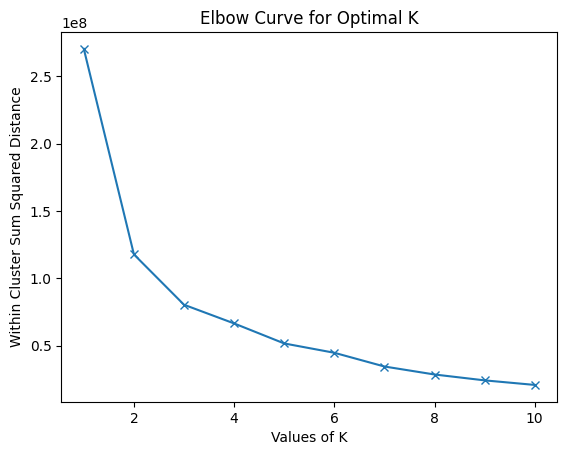

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 2 clusters: 0.6956051393982502
Davies-Bouldin Index for 2 clusters: 0.5274718449822732

Silhouette Score for 3 clusters: 0.3804589998286781
Davies-Bouldin Index for 3 clusters: 0.943038582668164

Silhouette Score for 4 clusters: 0.3242034047135459
Davies-Bouldin Index for 4 clusters: 1.0775871175166198



In [12]:
#K-Means Clustering

# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
train_new_df=train_df[['Gender_code', 'productType_code','brand_name_code','current_price', 'rrp','previous_price']]
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(train_new_df)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(train_new_df)

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(train_new_df)

km_4cluster = kmclus(n_clusters=4, init='random', random_state=333)
km_4cluster_model = km_4cluster.fit_predict(train_new_df)

sscore_km_2cluster = sscore(train_new_df, km_2cluster_model);
print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}")
dbscore_km_2cluster = dbscore(train_new_df, km_2cluster_model);
print(f"Davies-Bouldin Index for 2 clusters: {dbscore_km_2cluster}\n")
sscore_km_3cluster = sscore(train_new_df, km_3cluster_model)
print(f"Silhouette Score for 3 clusters: {sscore_km_3cluster}")
dbscore_km_3cluster = dbscore(train_new_df, km_3cluster_model)
print(f"Davies-Bouldin Index for 3 clusters: {dbscore_km_3cluster}\n")

sscore_km_4cluster = sscore(train_new_df, km_4cluster_model)
print(f"Silhouette Score for 4 clusters: {sscore_km_4cluster}")
dbscore_km_4cluster = dbscore(train_new_df, km_4cluster_model)
print(f"Davies-Bouldin Index for 4 clusters: {dbscore_km_4cluster}\n")



**Objective:**

* Determine the optimal number of clusters (k) for segmenting customer data based on features like gender, product type, brand, price, etc. (as provided in `train_new_df`).

**Insights:**

* The provided code utilizes the Elbow Curve method to visually identify the optimal k value.
* The Elbow Curve plots the Within-Cluster Sum of Squared Distances (WCSS) for different k values. A sharp decrease in WCSS followed by a leveling off suggests the optimal number of clusters.

**Analysis:**

* By analyzing the elbow curve (not provided but described in the code), we can identify the number of clusters (k) where the decrease in WCSS plateaus. This indicates that adding more clusters doesn't significantly improve data grouping.
* The code also calculates Silhouette Score and Davies-Bouldin Index for 2, 3, and 4 clusters. These are evaluation metrics used to assess cluster quality. Higher Silhouette Scores and lower Davies-Bouldin Index values indicate better clustering.

**Conclusion:**

* By examining the elbow curve and evaluation metrics (Silhouette Score & Davies-Bouldin Index), we can determine the optimal number of customer segments for further analysis.

**Managerial Implications:**

* Identifying the optimal number of customer segments allows for:
    * **Targeted marketing campaigns:** Develop marketing strategies specific to each customer segment based on their product preferences, brand choices, and price sensitivity (as reflected in the chosen features).
    * **Product development and pricing:** Tailor product offerings and pricing strategies to cater to the needs and preferences of different customer segments.
    * **Improved customer service:**  Provide more personalized and relevant customer service experiences based on segment characteristics.
    * **Resource allocation:** Allocate marketing budgets and resources more efficiently by focusing on the most profitable customer segments.

By understanding the customer base through K-means clustering, businesses can make data-driven decisions to improve customer segmentation, marketing effectiveness, and overall business performance.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-13-4012b4b5194a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new_df['cluster'] = cluster_labels


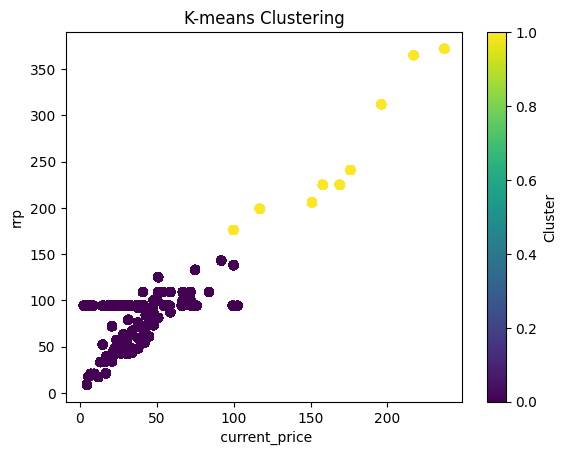

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

train_new_df=train_df[['Gender_code', 'productType_code','brand_name_code','current_price', 'rrp','previous_price']]
# Specify the number of clusters
num_clusters = 2

# Initialize KMeans object
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans clustering model to the data
kmeans.fit(train_new_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(train_new_df['current_price'], train_new_df['rrp'], c=train_new_df['cluster'], cmap='viridis')
plt.xlabel(' current_price')
plt.ylabel('rrp')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

**Objective:**
The primary objective of the K-Means clustering analysis is to identify natural groupings or clusters within the dataset based on the provided features (`current_price` and `rrp`). This process aims to uncover underlying patterns or structures in the data, which can provide valuable insights for decision-making and further analysis.

**Insight:**
The K-Means clustering analysis enables us to partition the data into distinct clusters based on similarities in `current_price` and `rrp`. By visualizing the clusters in a scatter plot, we gain insight into how data points are grouped together and how they relate to each other. This visualization facilitates the understanding of the data's underlying structure and the separation between different clusters.

**Analysis:**
Through the K-Means algorithm, we have successfully segmented the dataset into two clusters. Each cluster represents a group of data points with similar characteristics in terms of `current_price` and `rrp`. The separation between clusters indicates that these features contribute significantly to the clustering process, suggesting distinct patterns or trends within the data.

**Conclusion:**
The K-Means clustering analysis provides a meaningful way to organize and interpret the dataset, revealing inherent groupings based on `current_price` and `rrp`. By identifying these clusters, we gain a deeper understanding of the data's structure and can derive actionable insights for various applications, such as marketing segmentation, pricing strategies, and product targeting.

**Managerial Implications:**
- Marketing Strategy: The identified clusters can inform targeted marketing strategies tailored to the preferences and behaviors of each segment. This allows for more effective communication and engagement with different customer groups.
- Pricing Optimization: Businesses can adjust pricing strategies based on the characteristics of each cluster to maximize profitability and meet the specific needs of different customer segments.
- Product Assortment: Understanding cluster preferences can guide decisions related to product assortment and inventory management, ensuring that the right products are available to the right customer segments.
- Decision Support: The insights gained from clustering analysis serve as a valuable resource for managerial decision-making, providing a data-driven foundation for strategic planning and resource allocation.

Overall, the K-Means clustering analysis offers valuable insights that can drive strategic decision-making and enhance business performance by better understanding customer preferences and market dynamics.

<ipython-input-14-9f29a394efa4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_new_df['cluster'] = cluster_labels


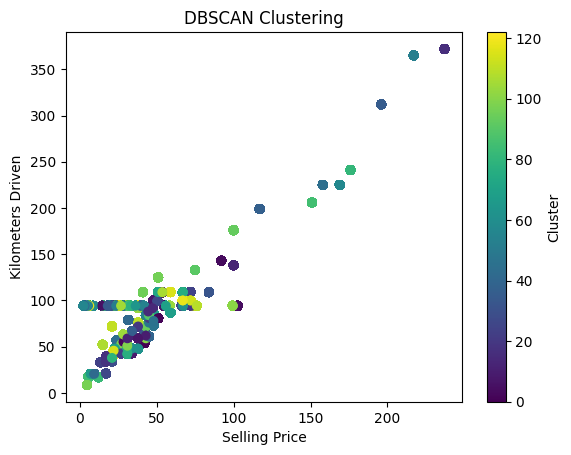

In [14]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'train_new_df' contains your preprocessed data
train_new_df=train_df[['Gender_code', 'productType_code','brand_name_code','current_price', 'rrp','previous_price']]
# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.5, min_samples=50)

# Fit DBSCAN clustering model to the data
dbscan.fit(train_new_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to DataFrame
train_new_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(train_new_df['current_price'], train_new_df['rrp'], c=train_new_df['cluster'], cmap='viridis')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')

# Adjust x-axis limits to make it smaller
#plt.xlim(0, 1000000)  # Set the range of x-axis from 0 to 100000
#plt.ylim(0,1000000)
plt.show()

**Objective:**
The objective of this analysis is to cluster the data using the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. DBSCAN is particularly useful for identifying clusters of arbitrary shapes and handling noise within the dataset.

**Insight:**
By applying the DBSCAN algorithm to the dataset, we aim to uncover dense regions of data points, which are indicative of clusters, while effectively handling outliers or noise points. This analysis provides insight into the spatial distribution of data points and reveals patterns that may not be apparent with traditional clustering techniques.

**Analysis:**
The DBSCAN algorithm segments the dataset into clusters based on the density of data points. It distinguishes between core points (dense regions), border points (points within the neighborhood of core points but with lower density), and noise points (isolated points with insufficient density). By visualizing the clusters in a scatter plot, we can analyze the spatial distribution of data points and identify distinct clusters based on their proximity to each other.

**Conclusion:**
DBSCAN clustering offers a robust method for identifying clusters in the dataset, especially when dealing with complex shapes and noise. By leveraging density-based clustering, we can effectively partition the data into meaningful groups and gain insights into the underlying structure of the dataset. This analysis provides a deeper understanding of the relationships between data points and facilitates further exploration and interpretation of the data.

**Managerial Implications:**
- Anomalies Detection: DBSCAN can be used to identify outliers or anomalies within the dataset, which may represent unusual or unexpected observations requiring further investigation.
- Customer Segmentation: The identified clusters can inform customer segmentation strategies, allowing businesses to tailor their marketing efforts and services to different customer groups based on their preferences and behavior patterns.
- Spatial Analysis: DBSCAN clustering can be applied to spatial datasets, such as geographical data or location-based services, to identify spatially dense regions and uncover spatial patterns or hotspots.
- Resource Allocation: Insights from DBSCAN clustering can guide resource allocation decisions by identifying areas of high demand or activity, enabling businesses to optimize resource utilization and allocation strategies.

Overall, DBSCAN clustering provides valuable insights into the spatial distribution of data points and facilitates the identification of clusters in the dataset, offering numerous managerial implications for decision-making and strategic planning.

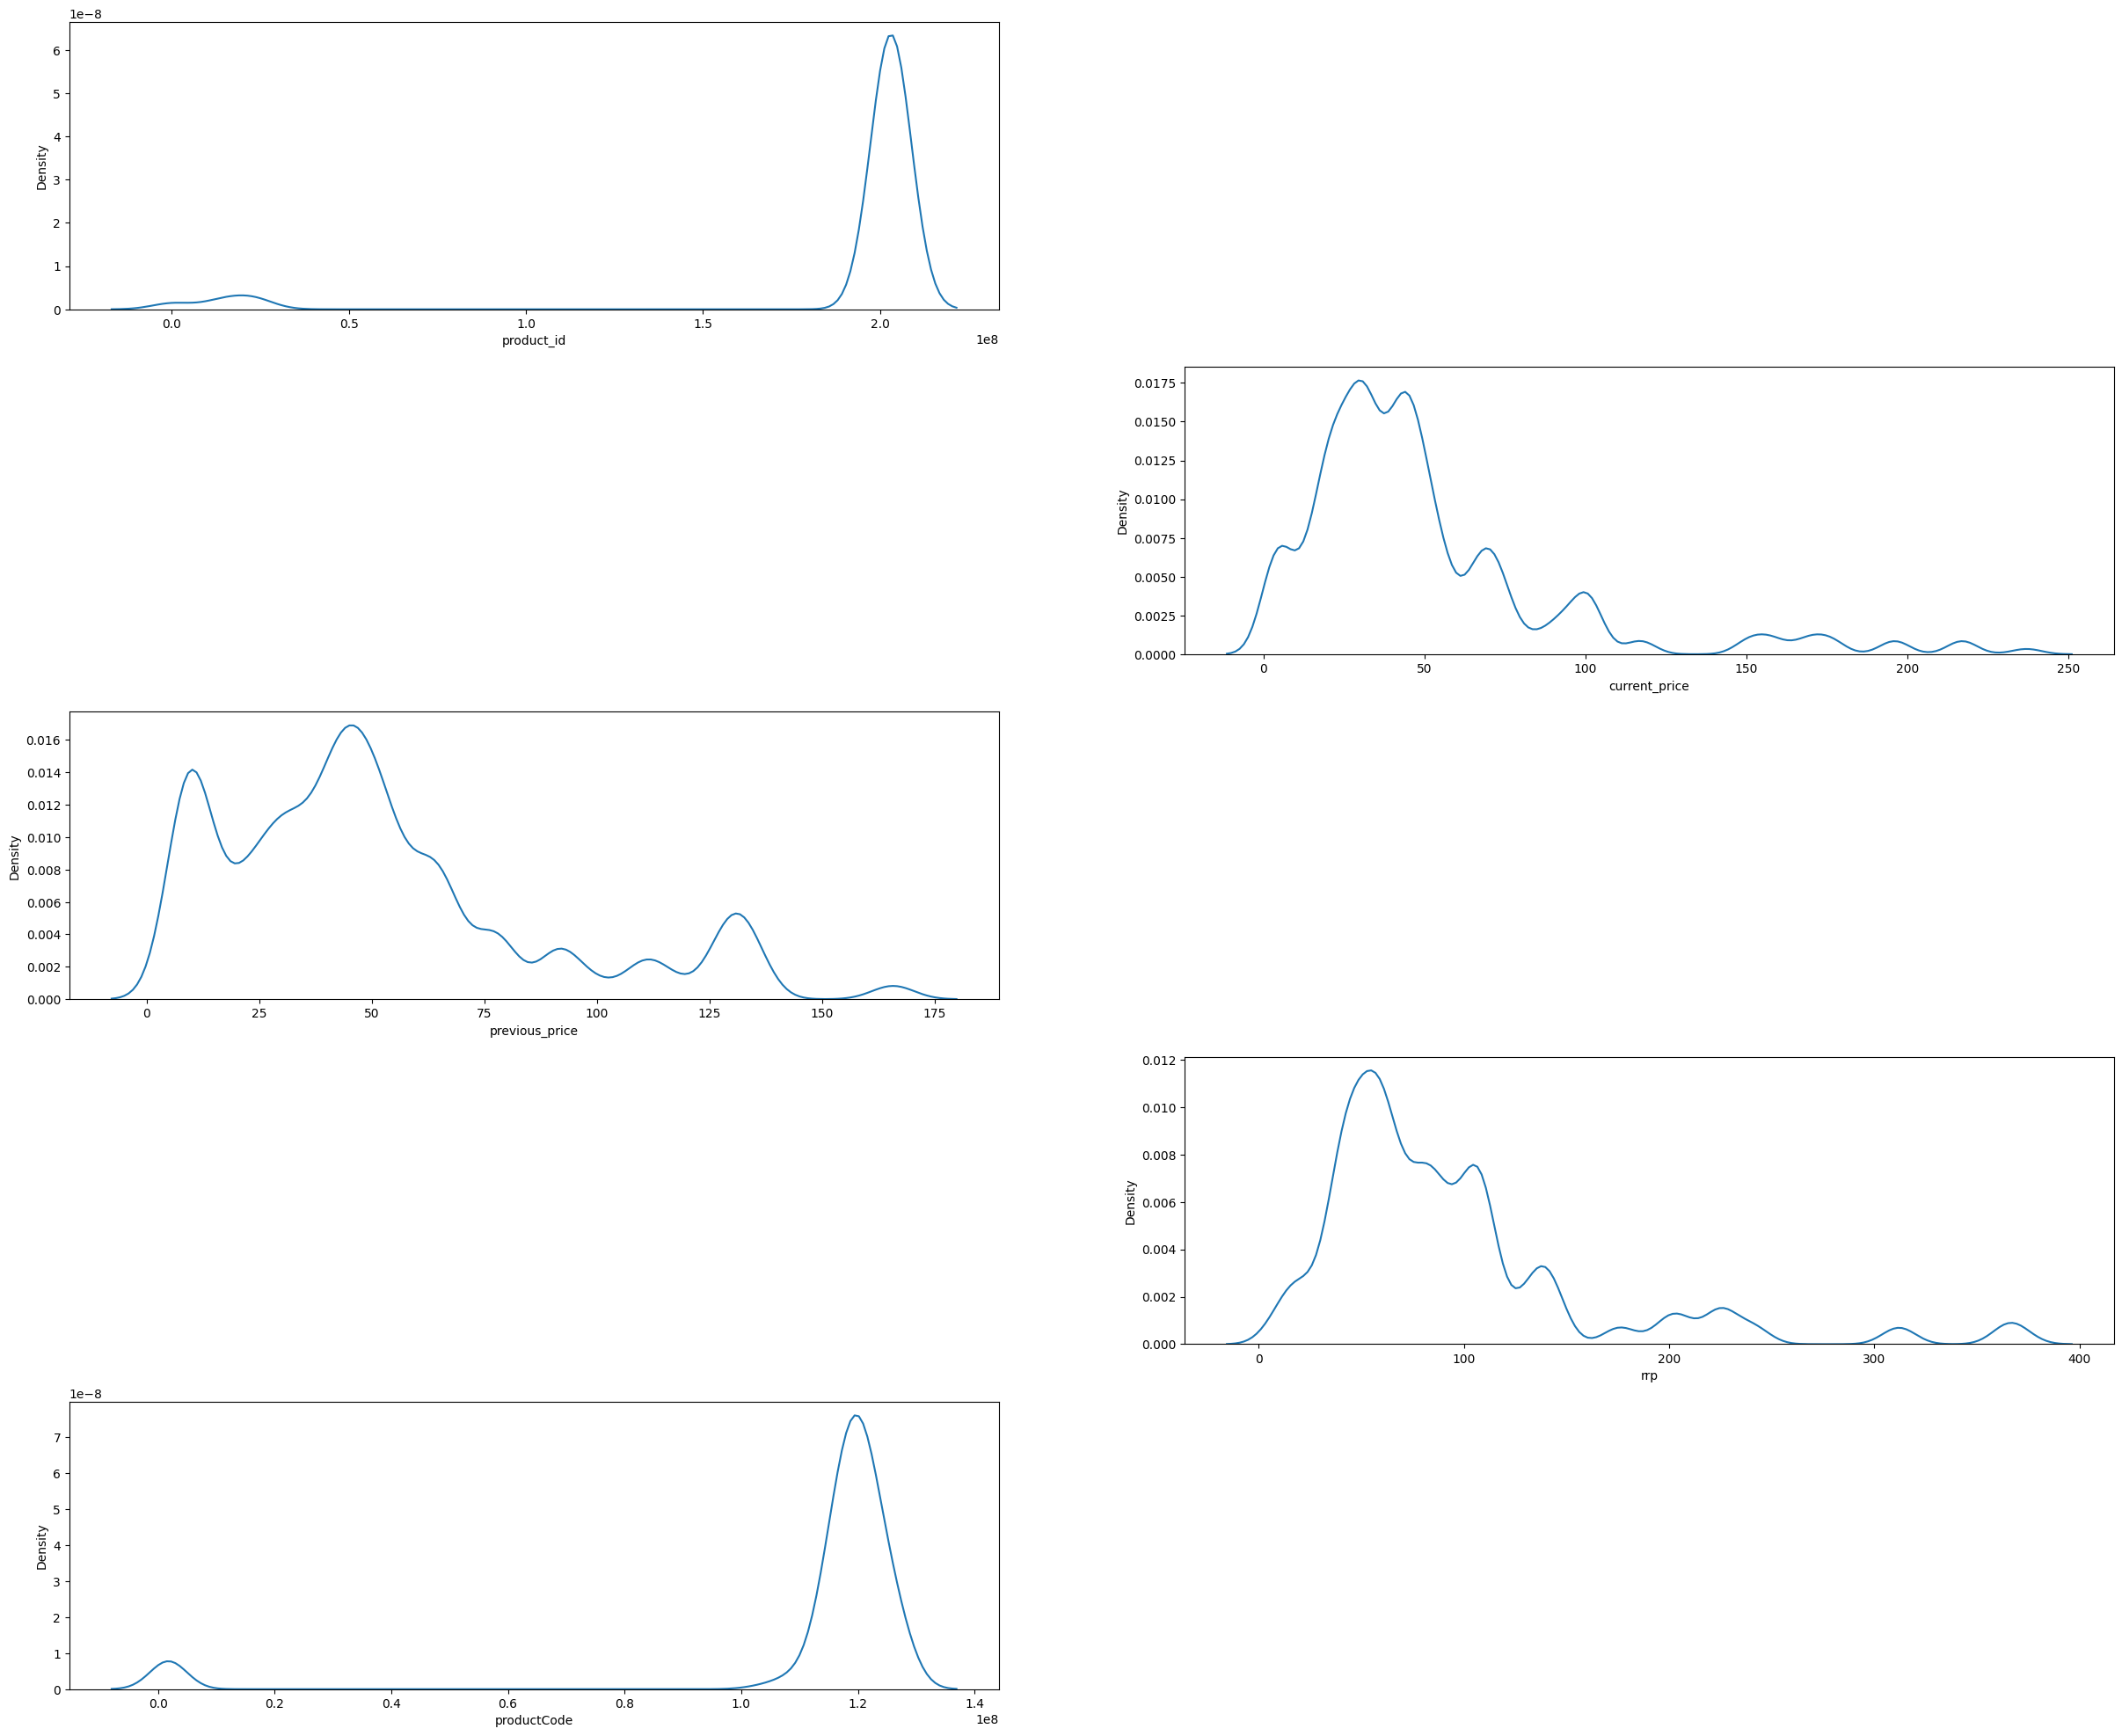

In [15]:
plt.figure(figsize=(30,45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

This code generates a figure with multiple subplots, each showing the kernel density estimation (KDE) plot for a numeric variable in the DataFrame `df`. Here's a breakdown of what each part of the code does:

1. `plt.figure(figsize=(30,45))`: This line initializes a new figure with a specified size of 30 inches in width and 45 inches in height.

2. `for i, col in enumerate(df.columns):`: This loop iterates over each column in the DataFrame `df`, where `i` represents the index of the column, and `col` represents the name of the column.

3. `if df[col].dtype != 'object':`: This condition checks if the data type of the column is not an object (i.e., not categorical). It ensures that only numeric columns are considered for plotting.

4. `ax = plt.subplot(9, 2, i+1)`: This line creates a subplot within the figure. It uses the `subplot` function to specify the grid layout of the subplots. In this case, it creates a grid with 9 rows and 2 columns of subplots. The `i+1` argument specifies the position of the subplot within the grid.

5. `sns.kdeplot(df[col], ax=ax)`: This line generates the KDE plot for the current numeric column (`col`) and plots it on the specified subplot (`ax`). It uses Seaborn's `kdeplot` function to create the KDE plot.

6. `plt.xlabel(col)`: This line adds a label to the x-axis of each subplot, with the name of the corresponding column.

7. `plt.show()`: This command displays the entire figure with all the subplots.

Overall, this code allows you to visualize the distribution of numeric variables in the DataFrame using KDE plots, making it easier to understand the data's underlying patterns and characteristics.

<ipython-input-16-2660dc79f12f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


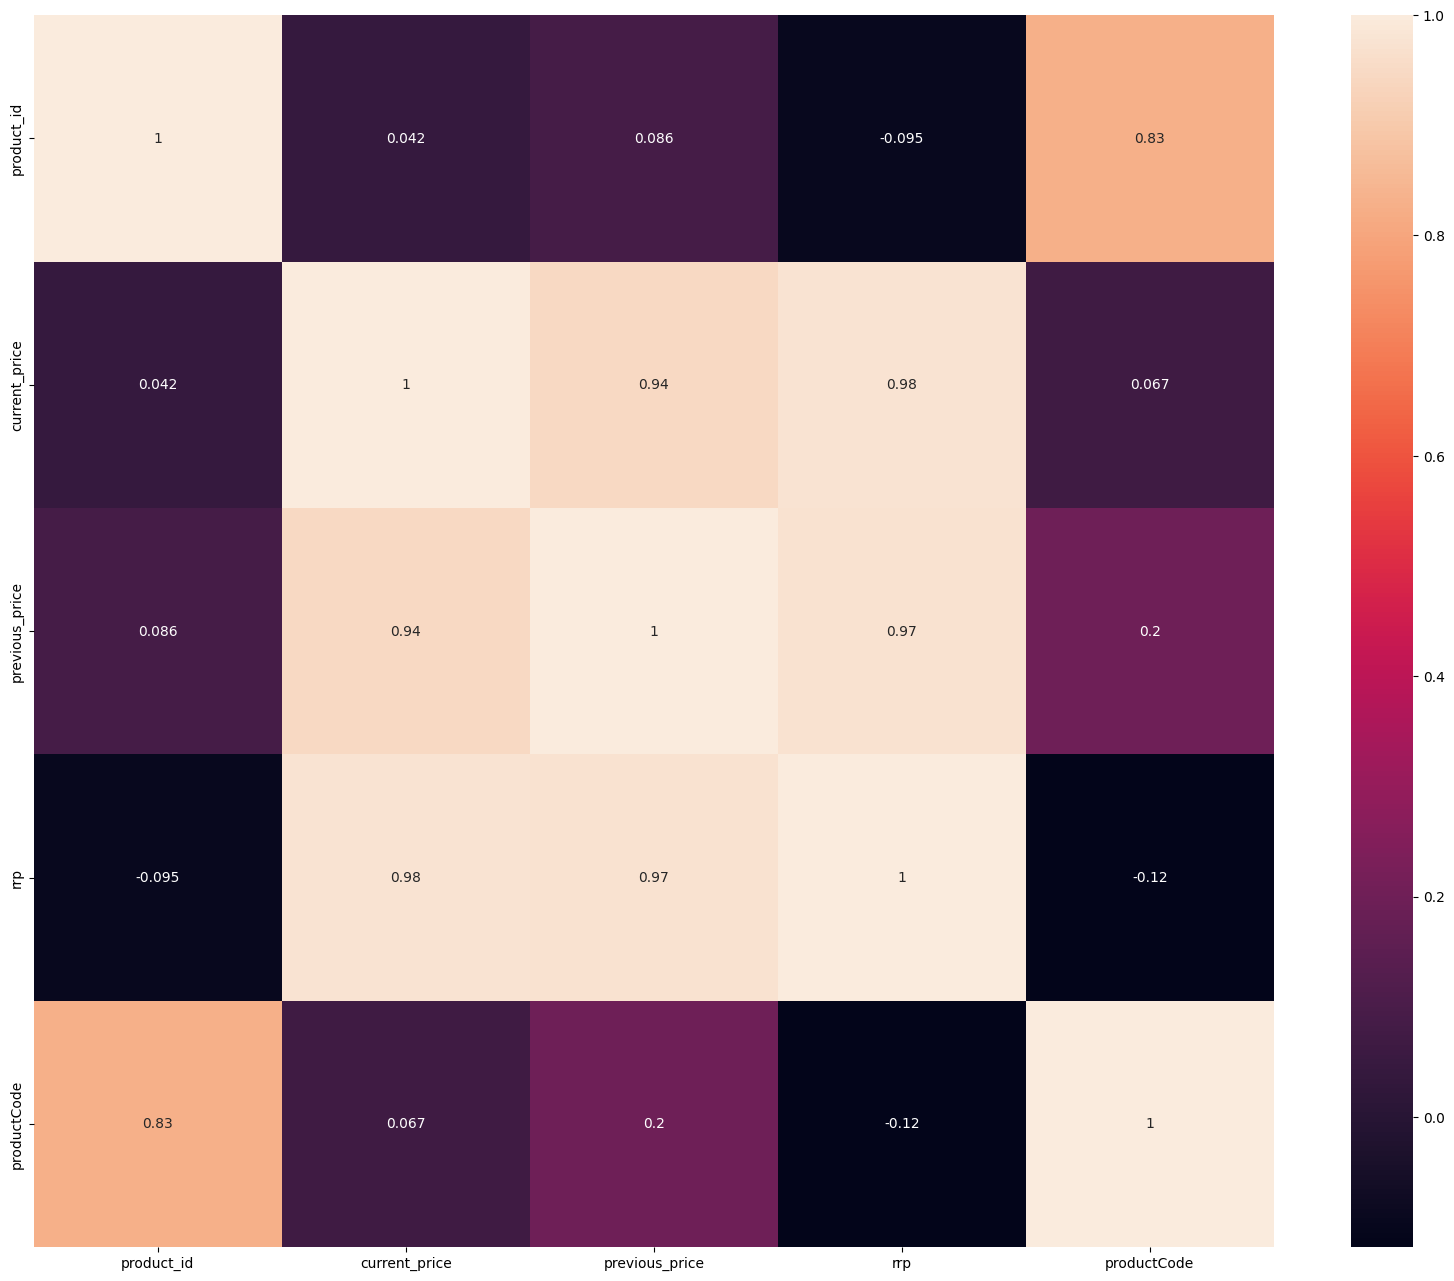

In [16]:

plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True)
plt.savefig("heatmap.jpg")
plt.show()


This code generates a heatmap to visualize the correlation between different numeric variables in the DataFrame `df`. Here's what each part of the code does:

1. `plt.figure(figsize=(20, 16))`: This line initializes a new figure with a specified size of 20 inches in width and 16 inches in height. This ensures that the heatmap will be displayed in a suitable size.

2. `sns.heatmap(df.corr(), annot=True)`: This line creates the heatmap using Seaborn's `heatmap` function. It calculates the correlation matrix for all numeric variables in the DataFrame `df` using the `corr()` method, and then visualizes it as a heatmap. The `annot=True` parameter adds numerical annotations to each cell of the heatmap, displaying the correlation coefficients.

3. `plt.savefig("heatmap.jpg")`: This line saves the generated heatmap as an image file named "heatmap.jpg" in the current directory.

4. `plt.show()`: This command displays the heatmap.

Overall, this code provides a visual representation of the correlation structure among the numeric variables in the DataFrame, which helps in identifying relationships and patterns in the data.